In [154]:
using DSP;
using PyPlot;

1. Projete usando o m´etodo dos m´ınimos quadrados os filtros a seguir:

(a) Um filtro com N = 101 coeficientes que aproxime a resposta ideal




In [155]:
#Primeiro filtro passa baixa com freq de corte=pi/4;
N=101;
wc=pi/4;
M=N-1;
L=M/2;

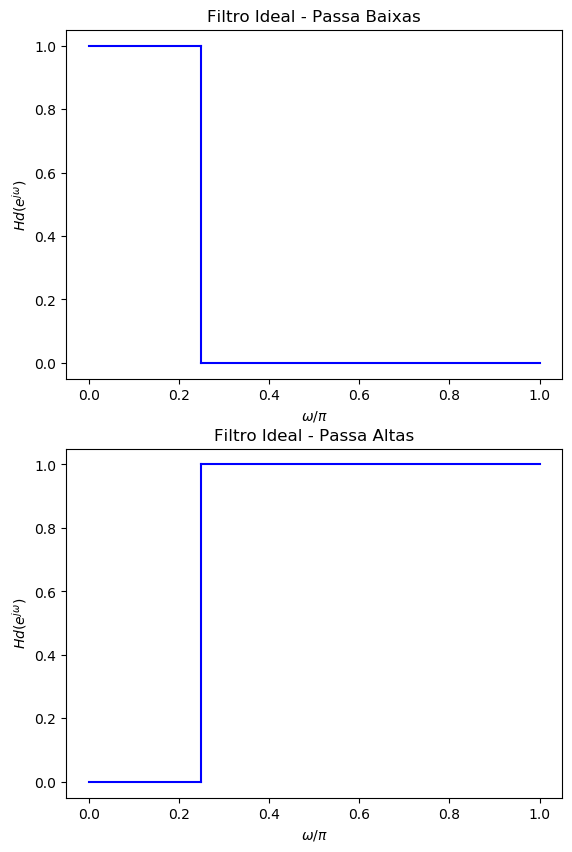

In [156]:
subplot(211);
plot([0;1/4],([1;1]),"b");
plot([1/4;1/4],([1;0]),"b");
plot([1/4,1],[0;0],"b");
title("Filtro Ideal - Passa Baixas");
xlabel(L"$\omega/\pi$")
ylabel(L"$Hd(e^{j\omega})$");
subplots_adjust(bottom=-1.1, top=0.5)
subplot(212);
plot([0;1/4],([0;0]),"b");
plot([1/4;1/4],([0;1]),"b");
plot([1/4,1],[1;1],"b");
title("Filtro Ideal - Passa Altas");
xlabel(L"$\omega/\pi$");
ylabel(L"$Hd(e^{j\omega})$");

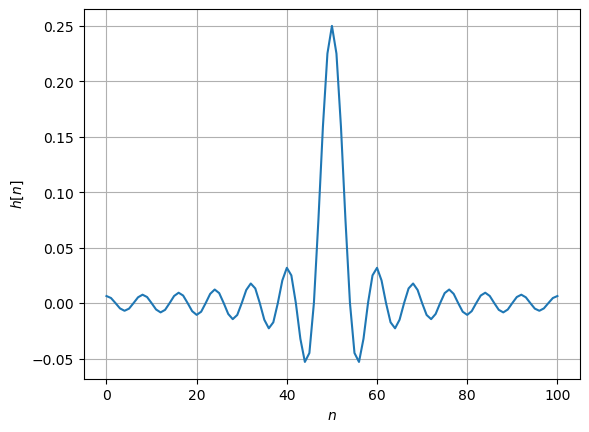

In [157]:
na=0:M;
h=(wc/pi)*sinc.((wc/pi)*(na.-L));
plot(na,h);
xlabel(L"n");
ylabel(L"h[n]");
grid()

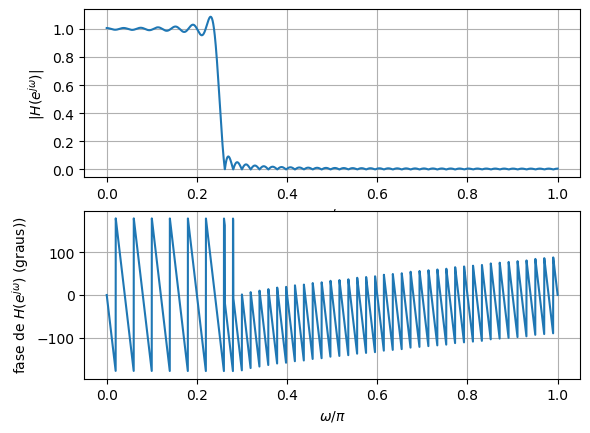

In [158]:
hf=PolynomialRatio(h,[1]);
w=range(0,pi,length=5000);
H=freqz(hf,w);
subplot(211);
plot(w/pi,abs.(H))
grid()
ylabel(L"$|H(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212);
plot(w/pi,angle.(H)*180/pi)
grid()
xlabel(L"$\omega/\pi$")
ylabel(L"fase de $H(e^{j\omega})$ (graus))");

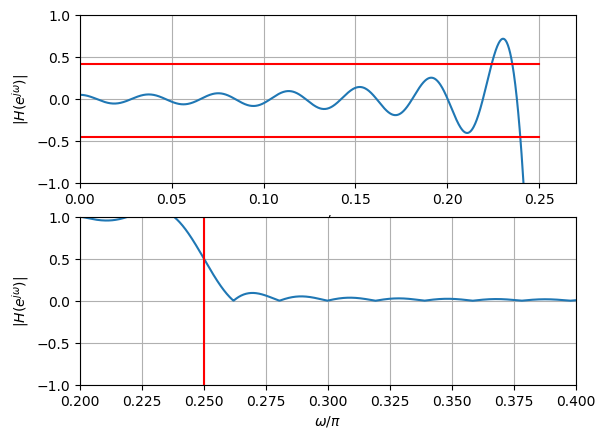

In [159]:
subplot(211);
plot(w/pi,20*log10.(abs.(H)))
grid()
ylabel(L"$|H(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
axis([0,(wc+pi/50)/pi,-1,1])
plot([0;wc/π],20*log10.([0.95;0.95]),"r")
plot([0;wc/π],20*log10.([1.05,1.05]),"r")
subplot(212);
plot(w/pi,abs.(H))
grid()
ylabel(L"$|H(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
plot([wc;pi]/π,20*log10.([0.005;0.005]),"r")
plot([wc;wc]/π,[-10;10],"r")
axis([0.2,0.4,-1,1]);

(b) Um filtro com N = 101 coeficientes que aproxime a resposta ideal


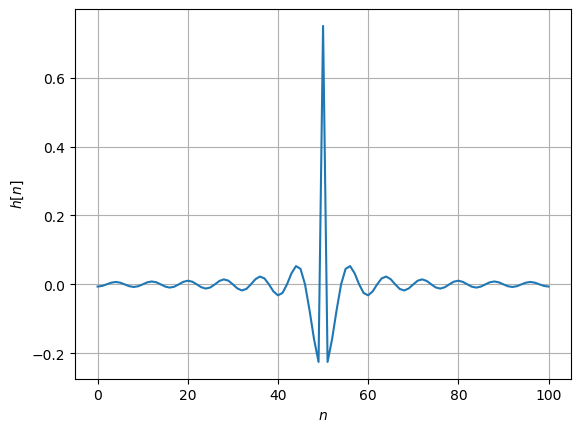

In [160]:
#Filtro passa alta com freq de corte=pi/4
wcmod=pi-(pi/4);
hpa=(wcmod/pi)*sinc.((wcmod/pi)*(na.-L)).*(-1).^(0:M);
hfpa=PolynomialRatio(hpa,[1]);
plot(na,hpa)
xlabel(L"n");
ylabel(L"h[n]");
grid()
wa=range(0,π,length=5000);

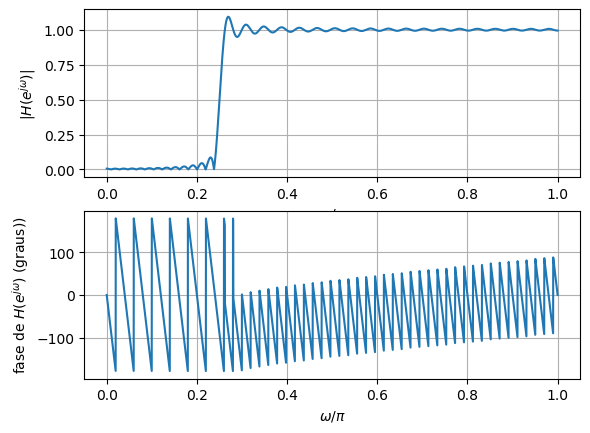

In [161]:
Hpa=freqz(hfpa,wa);
subplot(211)
plot(wa/pi,abs.(Hpa))
xlabel(L"$\omega/\pi$")
ylabel(L"$|H(e^{j\omega})|$")
grid()
subplot(212);
plot(w/pi,angle.(H)*180/pi);
grid();
xlabel(L"$\omega/\pi$")
ylabel(L"fase de $H(e^{j\omega})$ (graus))");

2. Teste os seus filtros para o sinal de entrada

x[n] = cos(πn/20) + cos(πn/3).

(a) Use o comando filter e obtenha a saída de cada um dos filtros para o sinal
acima.

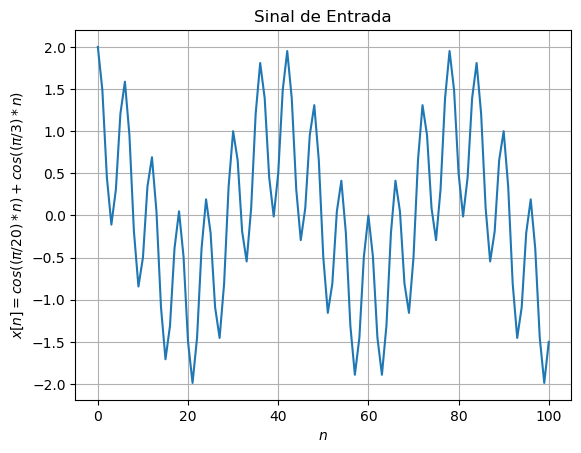

In [162]:
x = cos.((pi/20)*na) + cos.((pi/3)*na);
plot(na,x);
title("Sinal de Entrada");
grid();
ylabel(L"$x[n]=cos({(\pi/20)*n})+cos({(\pi/3)*n})$");
xlabel(L"n");

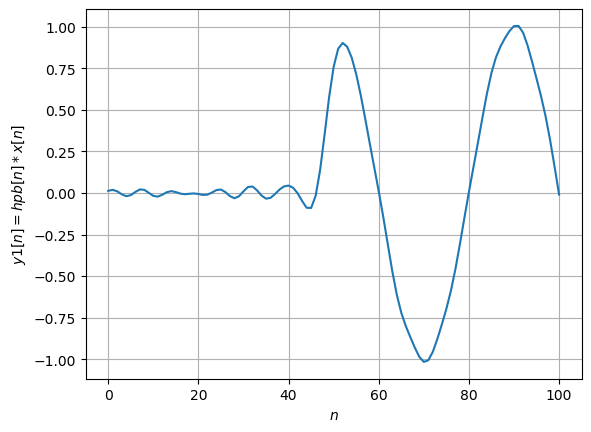

In [163]:
#Filtro Passa Baixa
ypb=filt(x,h);
plot(na,ypb);
grid();
ylabel(L"$y1[n]=hpb[n]*x[n]$");
xlabel(L"n");

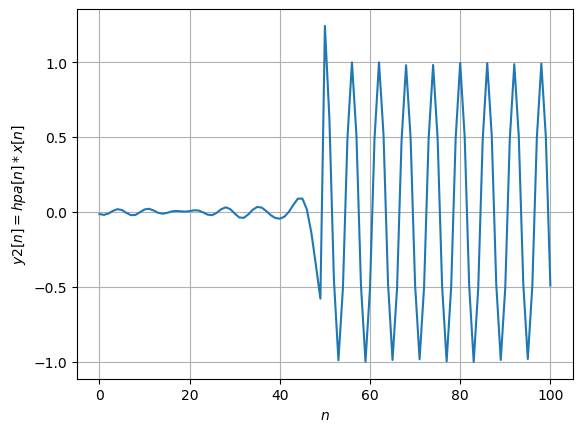

In [164]:
#Filtro Passa Alta

ypa=filt(x,hpa);
plot(na,ypa);
ylabel(L"$y2[n]=hpa[n]*x[n]$");
xlabel(L"n");
grid();

(b) Desenhe a resposta em frequência (módulo e fase) do filtro. Usando os sinais x1[n] = cos(πn/20) e x2[n] = cos(πn/3), compare a amplitude observada do sinal de saída dos filtros com as respostas em frequência calculadas para as duas frequências.

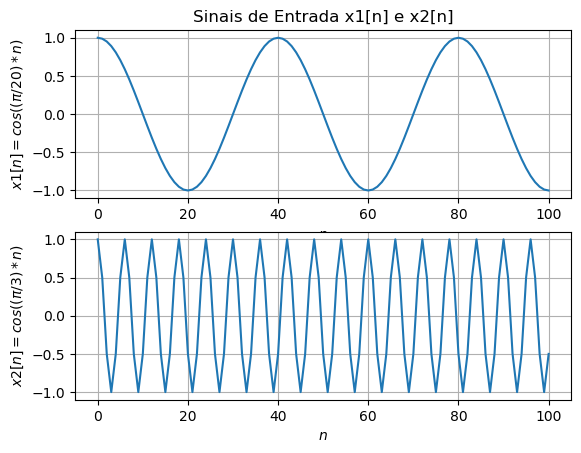

In [165]:
x1=cos.((pi/20)*na);
x2=cos.((pi/3)*na);
subplot(211);
plot(na,x1);
grid();
title("Sinais de Entrada x1[n] e x2[n]");
ylabel(L"$x1[n]=cos((\pi/20)*n)$");
xlabel(L"n");
subplot(212);
plot(na,x2);
ylabel(L"$x2[n]=cos((\pi/3)*n)$");
xlabel(L"n");
grid();

In [166]:
y1pb=filt(x1,h);
y2pb=filt(x2,h);
y1pa=filt(x1,hpa);
y2pa=filt(x2,hpa);

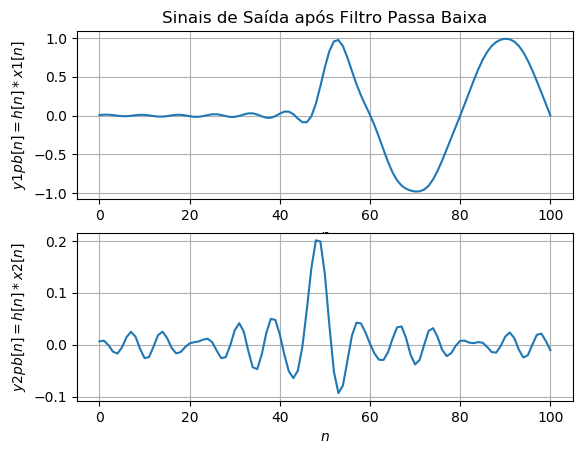

In [167]:
subplot(211);
plot(na,y1pb);
title("Sinais de Saída após Filtro Passa Baixa");
ylabel(L"$y1pb[n]=h[n]*x1[n]$");
xlabel(L"n");
grid();
subplot(212);
plot(na,y2pb);
xlabel(L"n");
ylabel(L"$y2pb[n]=h[n]*x2[n]$");
grid();

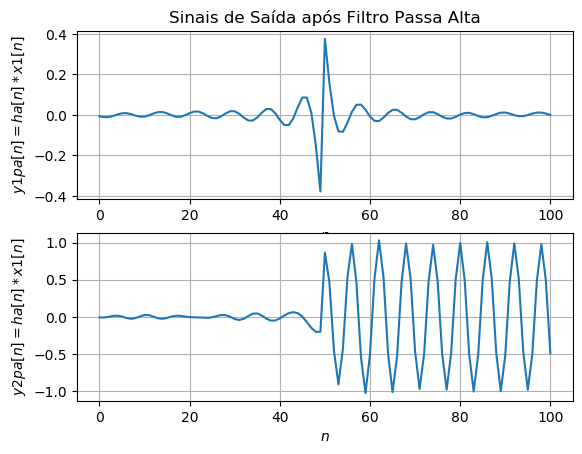

In [168]:
subplot(211);
plot(na,y1pa);
title("Sinais de Saída após Filtro Passa Alta");
ylabel(L"$y1pa[n]=ha[n]*x1[n]$");
xlabel(L"n");
grid();
subplot(212);
plot(na,y2pa);
xlabel(L"n");
ylabel(L"$y2pa[n]=ha[n]*x1[n]$");
grid();

/// Resposta em frequência

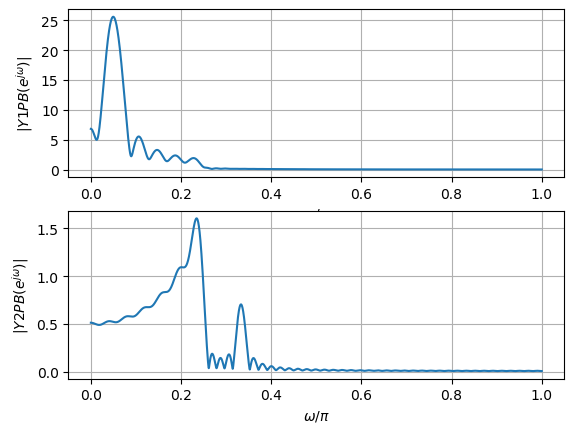

In [169]:
y1pbf=PolynomialRatio(y1pb,[1]);
Y1pb=freqz(y1pbf,w);
subplot(211);
plot(w/pi,abs.(Y1pb))
grid()
ylabel(L"$|Y1PB(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212);
y2pbf=PolynomialRatio(y2pb,[1]);
Y2pb=freqz(y2pbf,w);

plot(w/pi,abs.(Y2pb))
grid()
ylabel(L"$|Y2PB(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");


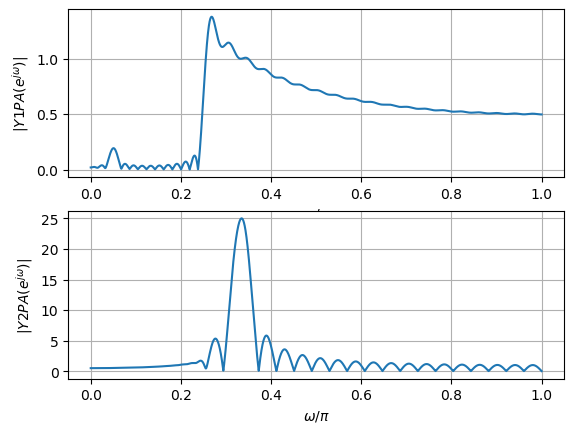

In [170]:
y1paf=PolynomialRatio(y1pa,[1]);
Y1pa=freqz(y1paf,w);
subplot(211);
plot(w/pi,abs.(Y1pa))
grid()
ylabel(L"$|Y1PA(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");

subplot(212);

y2paf=PolynomialRatio(y2pa,[1]);
Y2pa=freqz(y2paf,w);

plot(w/pi,abs.(Y2pa))
grid()
ylabel(L"$|Y2PA(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");

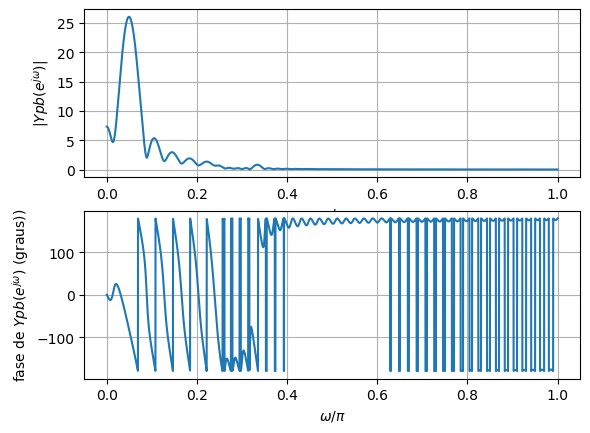

In [171]:
ypbf=PolynomialRatio(ypb,[1]);
Y1=freqz(ypbf,w);
subplot(211);
plot(w/pi,abs.(Y1))
grid()
ylabel(L"$|Ypb(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212);
plot(w/pi,angle.(Y1)*180/pi)
grid()
xlabel(L"$\omega/\pi$")
ylabel(L"fase de $Ypb(e^{j\omega})$ (graus))");

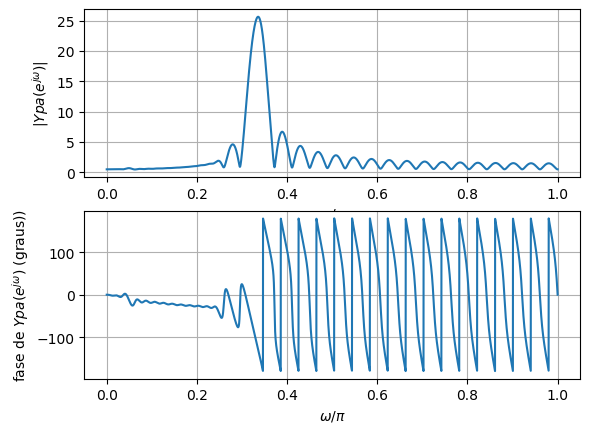

In [172]:
ypaf=PolynomialRatio(ypa,[1]);
Y2=freqz(ypaf,w);
subplot(211);
plot(w/pi,abs.(Y2))
grid()
ylabel(L"$|Ypa(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212);
plot(w/pi,angle.(Y2)*180/pi)
grid()
xlabel(L"$\omega/\pi$")
ylabel(L"fase de $Ypa(e^{j\omega})$ (graus))");

3. Suponha que você quer fazer um filtro passa-baixas e um passa-altas para separar os dois cossenos do exercício anterior. Projete os filtros usando janelas de Kaiser, supondo que:

(a) O erro no ganho da banda-passante deve ser menor ou igual a 0,005;

In [173]:
erro=0.005;
A=-20*log10(erro);
B=0.5842*(A-21)^0.4 + 0.07886*(A-21); #Parametro para janela de Kaiser p/ 21<A<50

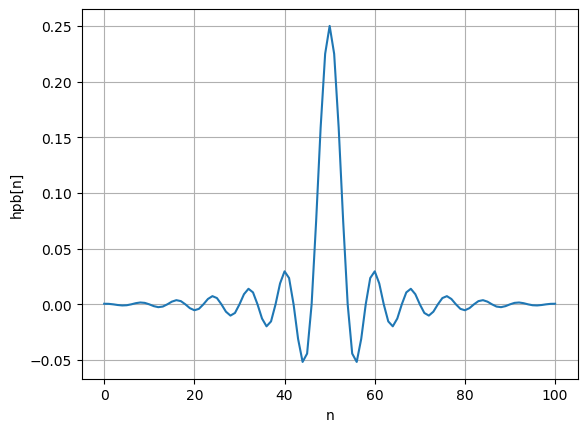

In [174]:
n=0:M;
hkaiser=(wc/pi)*sinc.((wc/pi)*(n.-L)).*kaiser(N,B/pi);
plot(n,hkaiser);
xlabel("n");
ylabel("hpb[n]");
grid();

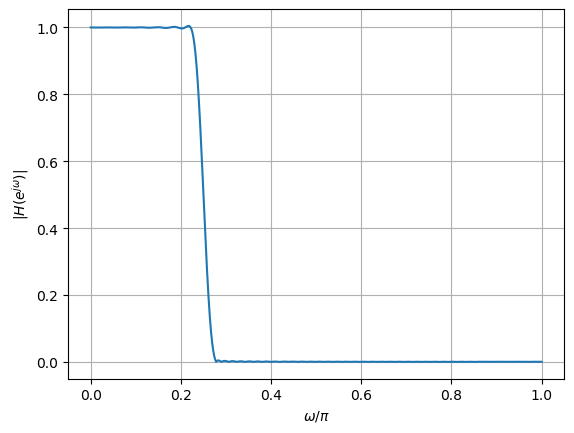

In [175]:
hfkaiser=PolynomialRatio(hkaiser,[1]);
wkaiser=range(0,pi,length=5000);
Hkaiser=freqz(hfkaiser,wkaiser);
plot(wkaiser/pi,abs.(Hkaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|H(e^{j\omega})|$");

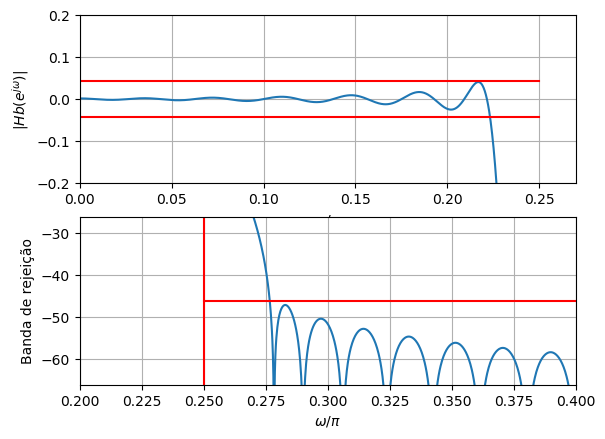

In [176]:

subplot(211);
plot(wkaiser/pi,20*log10.(abs.(Hkaiser)))
axis([0,(wc+pi/50)/π,-0.2,0.2])
plot([0;wc/π],20*log10.([0.995;0.995]),"r")
plot([0;wc/π],20*log10.([1.005;1.005]),"r")
grid()
ylabel(L"$|Hb(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212)
plot(wkaiser/pi,20*log10.(abs.(Hkaiser)))
plot([wc;pi]/π,20*log10.([0.005;0.005]),"r")
plot([wc;wc]/π,[-150;10],"r")
axis([0.2,0.4,-A-20,-A+20])
ylabel("Banda de rejeição")
grid()
xlabel(L"$\omega/\pi$");

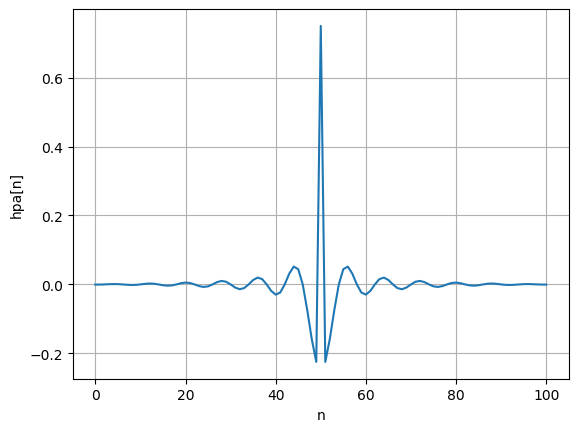

In [177]:
hpakaiser=(wcmod/pi)*sinc.((wcmod/pi)*(na.-L)).*(-1).^(0:M).*kaiser(N,B/pi);
hfpakaiser=PolynomialRatio(hpakaiser,[1]);
plot(n,hpakaiser);
xlabel("n");
ylabel("hpa[n]");
grid();

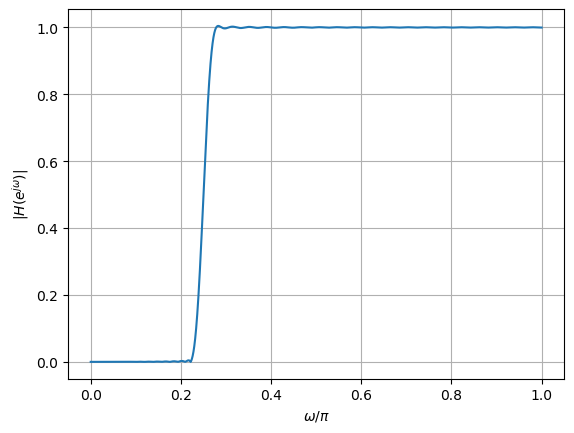

In [178]:
Hpakaiser=freqz(hfpakaiser,w)
plot(wkaiser/pi,abs.(Hpakaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|H(e^{j\omega})|$");

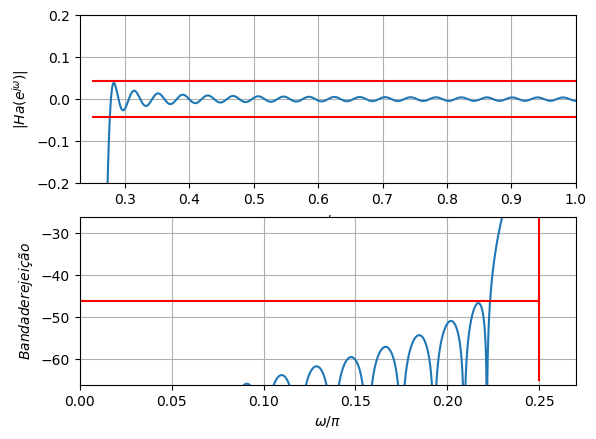

In [179]:
subplot(211)
plot(wkaiser/π,20*log10.(abs.(Hpakaiser)))
plot([wc/pi;1],20*log10.([0.995;0.995]),"r")
plot([wc/pi;1],20*log10.([1.005;1.005]),"r")
axis([(wc-(pi/50))/pi,1,-0.2,0.2])
grid()
ylabel(L"$|Ha(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212)
plot(wkaiser/pi,20*log10.(abs.(Hpakaiser)))
plot([0;wc]/pi,20*log10.([0.005;0.005]),"r")
plot([wc;wc]/pi,[-65;5],"r")
axis([0,(wc+(pi/50))/pi,-A-20,-A+20])
ylabel(L"Banda de rejeição")
grid()
xlabel(L"$\omega/\pi$");

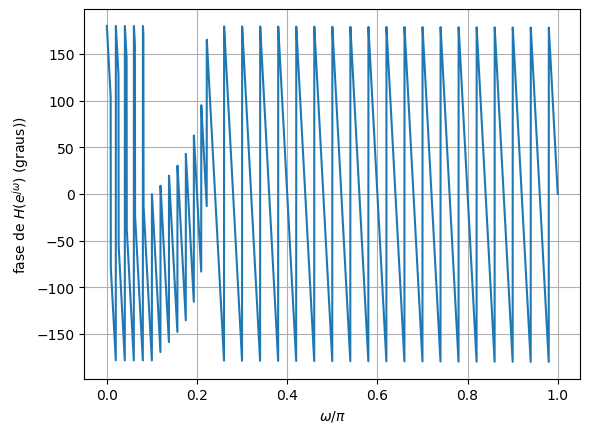

In [180]:
plot(wkaiser/π,angle.(Hpakaiser)*180/pi)
grid()
xlabel(L"$\omega/\pi$");
ylabel(L"fase de $H(e^{j\omega})$ (graus))");

Teste com erro A=0.005 e sinais x1 e x2;

In [181]:
y1pbkaiser=filt(x1,hkaiser);
y2pbkaiser=filt(x2,hkaiser);
y1pakaiser=filt(x1,hpakaiser);
y2pakaiser=filt(x2,hpakaiser);

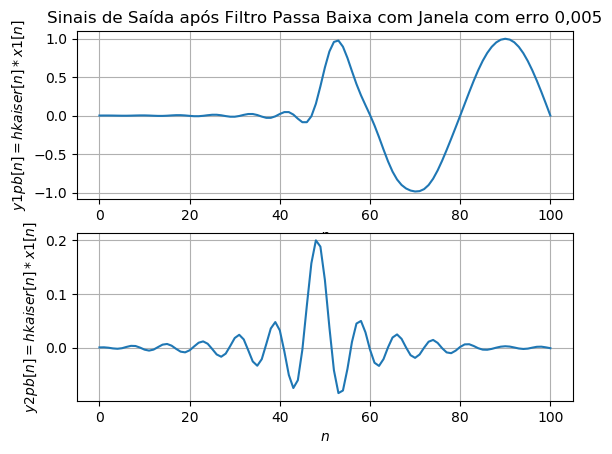

In [182]:
subplot(211);
plot(n,y1pbkaiser);
title("Sinais de Saída após Filtro Passa Baixa com Janela com erro 0,005");
ylabel(L"$y1pb[n]=hkaiser[n]*x1[n]$");
xlabel(L"n");
grid();
subplot(212);
plot(n,y2pbkaiser);
xlabel(L"n");
ylabel(L"$y2pb[n]=hkaiser[n]*x1[n]$");
grid();

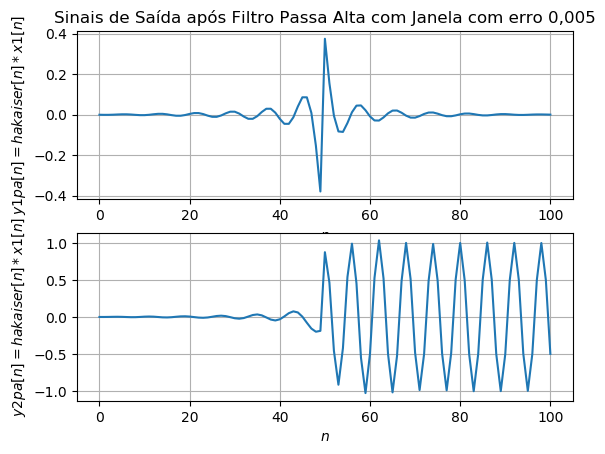

In [183]:
subplot(211);
plot(n,y1pakaiser);
title("Sinais de Saída após Filtro Passa Alta com Janela com erro 0,005");
ylabel(L"$y1pa[n]=hakaiser[n]*x1[n]$");
xlabel(L"n");
grid();
subplot(212);
plot(n,y2pakaiser);
xlabel(L"n");
ylabel(L"$y2pa[n]=hakaiser[n]*x1[n]$");
grid();

Teste com erro A=0.005 e o sinal x;

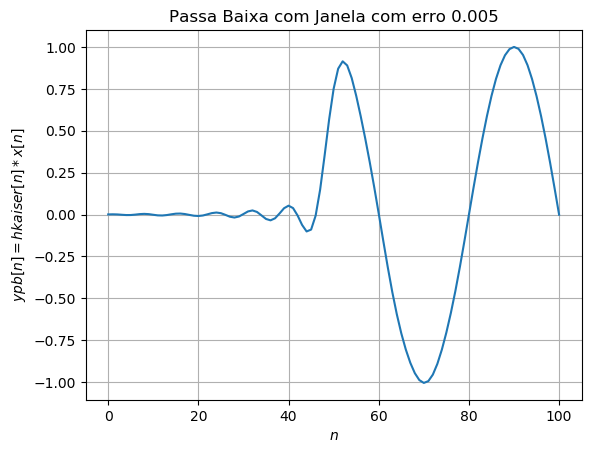

In [184]:
ypbkaiser=filt(x,hkaiser);
plot(n,ypbkaiser);
grid();
title("Passa Baixa com Janela com erro 0.005");
ylabel(L"$ypb[n]=hkaiser[n]*x[n]$");
xlabel(L"n");

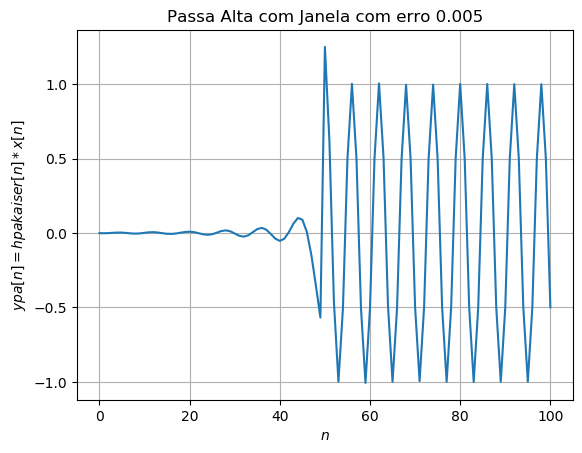

In [185]:
ypakaiser=filt(x,hpakaiser);
plot(n,ypakaiser);
grid();
title("Passa Alta com Janela com erro 0.005");
ylabel(L"$ypa[n]=hpakaiser[n]*x[n]$");
xlabel(L"n");

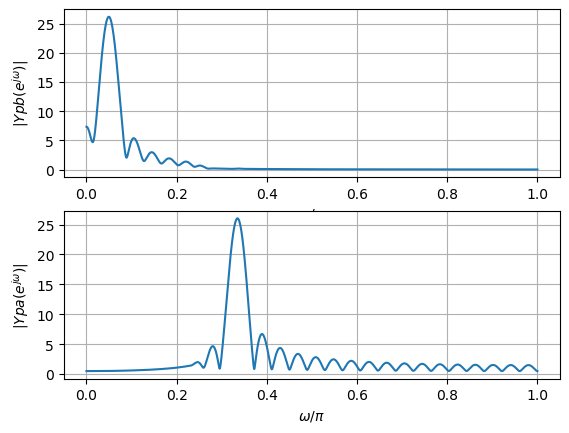

In [186]:
ypbkaiserf=PolynomialRatio(ypbkaiser,[1]);

Ypbkaiser=freqz(ypbkaiserf,w)
subplot(211);
plot(wkaiser/pi,abs.(Ypbkaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Ypb(e^{j\omega})|$");
subplot(212);
ypakaiserf=PolynomialRatio(ypakaiser,[1]);

Ypakaiser=freqz(ypakaiserf,w)

plot(wkaiser/pi,abs.(Ypakaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Ypa(e^{j\omega})|$");

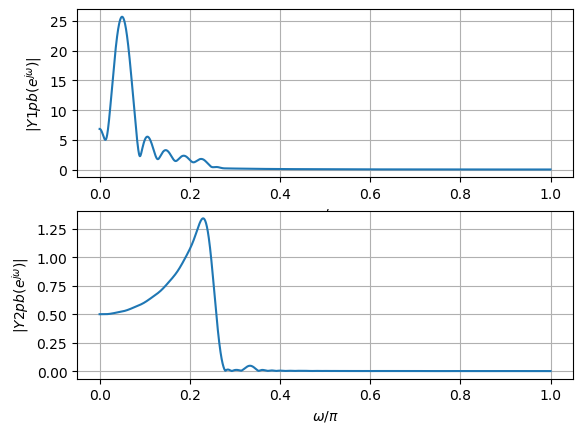

In [187]:
y1pbkaiserf=PolynomialRatio(y1pbkaiser,[1]);

Y1pbkaiser=freqz(y1pbkaiserf,w)

subplot(211);
plot(wkaiser/pi,abs.(Y1pbkaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Y1pb(e^{j\omega})|$");
subplot(212);
y2pbkaiserf=PolynomialRatio(y2pbkaiser,[1]);

Y2pbkaiser=freqz(y2pbkaiserf,w)

plot(wkaiser/pi,abs.(Y2pbkaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Y2pb(e^{j\omega})|$");

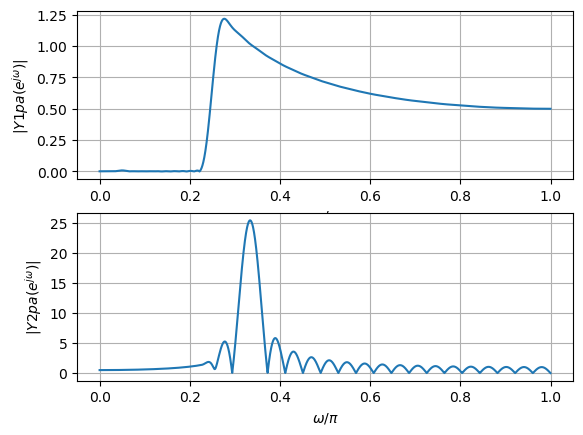

In [188]:
y1pakaiserf=PolynomialRatio(y1pakaiser,[1]);

Y1pakaiser=freqz(y1pakaiserf,w)
subplot(211);
plot(wkaiser/pi,abs.(Y1pakaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Y1pa(e^{j\omega})|$");
subplot(212);
y2pakaiserf=PolynomialRatio(y2pakaiser,[1]);

Y2pakaiser=freqz(y2pakaiserf,w)

plot(wkaiser/pi,abs.(Y2pakaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Y2pa(e^{j\omega})|$");

(b) o cosseno que será eliminado teve ser atenuado por pelo menos 0.001.

Projete os filtros, mostre as respostas em frequência obtidas, e experimente passar o sinal x[n] pelos filtros para comparar as saídas com os sinais desejados.

In [189]:
erro=0.001;
A=-20*log10(erro)
B=0.1102*(A-8.7); #Parametro para janela de Kaiser p/ A>50;

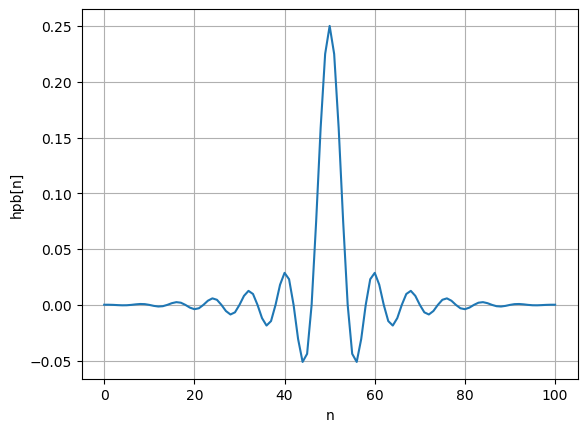

In [190]:
n=0:M;
hkaiser=(wc/pi)*sinc.((wc/pi)*(n.-L)).*kaiser(N,B/pi);
plot(n,hkaiser);
xlabel("n");
ylabel("hpb[n]");
grid();

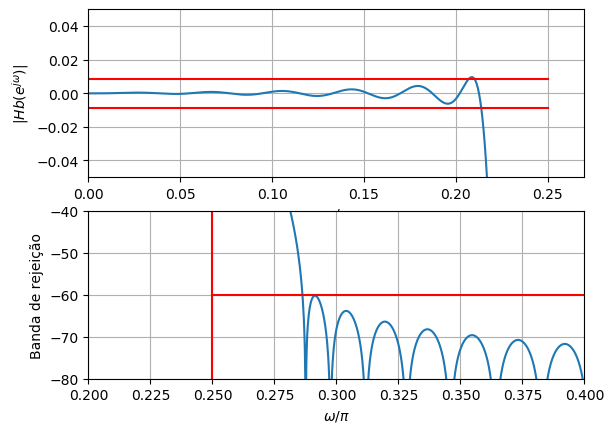

In [191]:
hfkaiser=PolynomialRatio(hkaiser,[1]);
wkaiser=range(0,pi,length=5000);
Hkaiser=freqz(hfkaiser,wkaiser);
subplot(211);
plot(wkaiser/pi,20*log10.(abs.(Hkaiser)))
axis([0,(wc+pi/50)/π,-0.05,0.05])
plot([0;wc/π],20*log10.([0.999;0.999]),"r")
plot([0;wc/π],20*log10.([1.001;1.001]),"r")
grid()
ylabel(L"$|Hb(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212)
plot(wkaiser/pi,20*log10.(abs.(Hkaiser)))
plot([wc;pi]/π,20*log10.([0.001;0.001]),"r")
plot([wc;wc]/π,[-150;10],"r")
axis([((wc-(pi/20))/pi),0.4,-A-20,-A+20])
ylabel("Banda de rejeição")
grid()
xlabel(L"$\omega/\pi$");

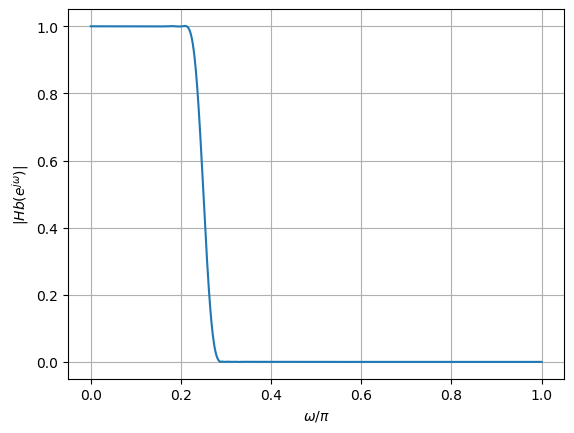

In [192]:
Hkaiser=freqz(hfkaiser,w)
plot(wkaiser/pi,abs.(Hkaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Hb(e^{j\omega})|$");

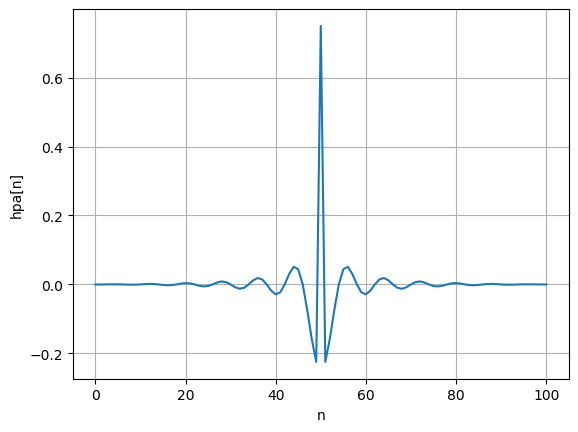

In [193]:
hpakaiser=(wcmod/pi)*sinc.((wcmod/pi)*(na.-L)).*(-1).^(0:M).*kaiser(N,B/pi);
hfpakaiser=PolynomialRatio(hpakaiser,[1]);
plot(n,hpakaiser);
grid();
xlabel("n");
ylabel("hpa[n]");

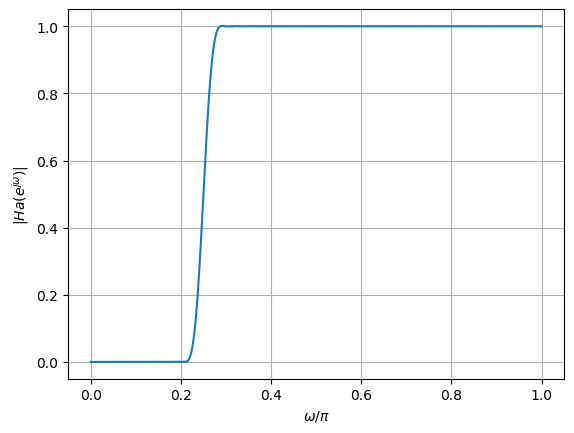

In [194]:
Hpakaiser=freqz(hfpakaiser,w)
plot(wkaiser/pi,abs.(Hpakaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Ha(e^{j\omega})|$");

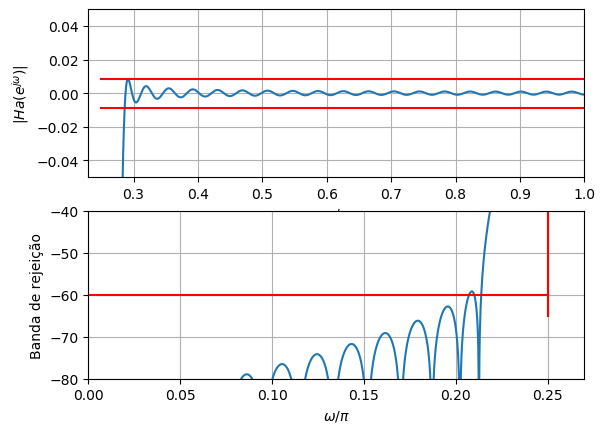

In [195]:
subplot(211)
plot(wkaiser/π,20*log10.(abs.(Hpakaiser)))
plot([wc/pi;1],20*log10.([0.999;0.999]),"r")
plot([wc/pi;1],20*log10.([1.001;1.001]),"r")
axis([(wc-(pi/50))/pi,1,-0.05,0.05])
grid()
ylabel(L"$|Ha(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212)
plot(wkaiser/pi,20*log10.(abs.(Hpakaiser)))
plot([0;wc]/pi,20*log10.([0.001;0.001]),"r")
plot([wc;wc]/pi,[-65;5],"r")
axis([0,(wc+(pi/50))/pi,-A-20,-A+20])
ylabel("Banda de rejeição")
grid()
xlabel(L"$\omega/\pi$");

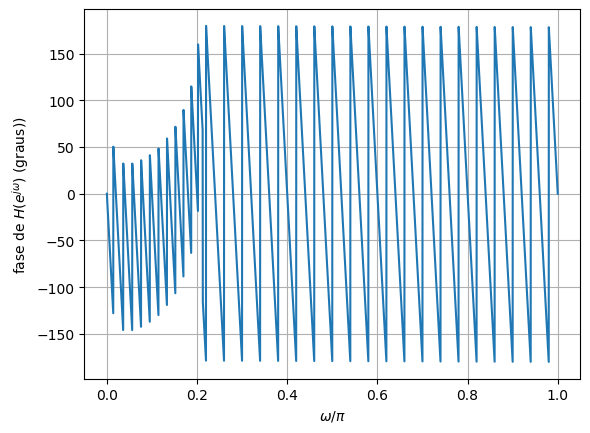

In [196]:
plot(wkaiser/π,angle.(Hpakaiser)*180/pi)
grid()
xlabel(L"$\omega/\pi$");
ylabel(L"fase de $H(e^{j\omega})$ (graus))");

Teste com erro A=0.001 e sinais x1 e x2;

In [197]:
y1pbkaiser=filt(x1,hkaiser);
y2pbkaiser=filt(x2,hkaiser);
y1pakaiser=filt(x1,hpakaiser);
y2pakaiser=filt(x2,hpakaiser);
y1kaiser=filt(x,hkaiser);
y2kaiser=filt(x,hpakaiser);

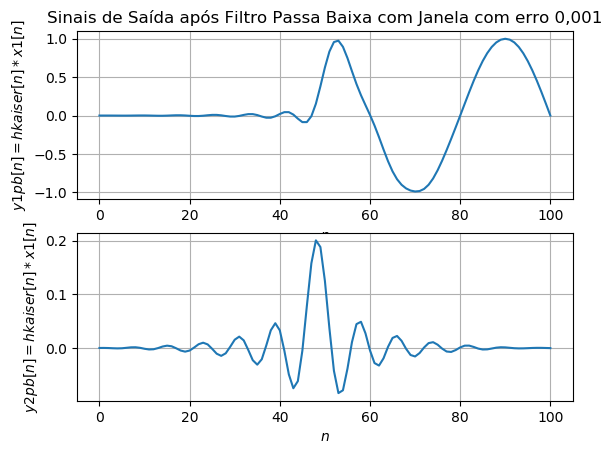

In [198]:
subplot(211);
plot(n,y1pbkaiser);
title("Sinais de Saída após Filtro Passa Baixa com Janela com erro 0,001");
ylabel(L"$y1pb[n]=hkaiser[n]*x1[n]$");
xlabel(L"n");
grid();
subplot(212);
plot(n,y2pbkaiser);
xlabel(L"n");
ylabel(L"$y2pb[n]=hkaiser[n]*x1[n]$");
grid();

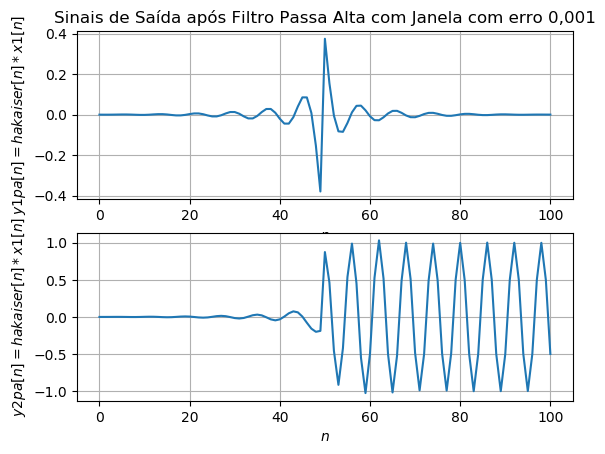

In [199]:
subplot(211);
plot(n,y1pakaiser);
title("Sinais de Saída após Filtro Passa Alta com Janela com erro 0,001");
ylabel(L"$y1pa[n]=hakaiser[n]*x1[n]$");
xlabel(L"n");
grid();
subplot(212);
plot(n,y2pakaiser);
xlabel(L"n");
ylabel(L"$y2pa[n]=hakaiser[n]*x1[n]$");
grid();

Teste com erro A=0.001 e o sinal x;

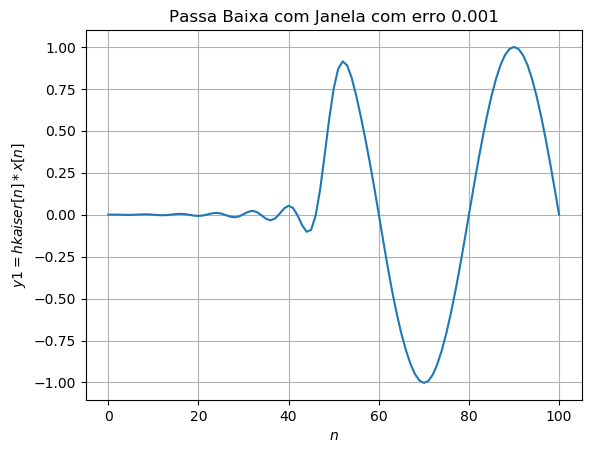

In [200]:
ypbkaiser=filt(x,hkaiser);
plot(n,ypbkaiser);
grid();
title("Passa Baixa com Janela com erro 0.001");
ylabel(L"$y1=hkaiser[n]*x[n]$");
xlabel(L"n");

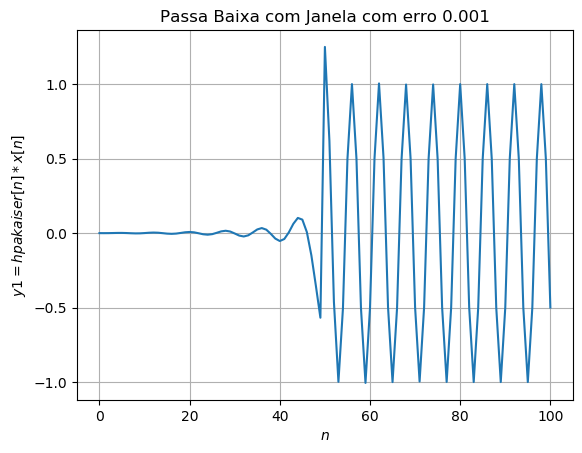

In [201]:
ypakaiser=filt(x,hpakaiser);
plot(n,ypakaiser);
grid();
title("Passa Baixa com Janela com erro 0.001");
ylabel(L"$y1=hpakaiser[n]*x[n]$");
xlabel(L"n");

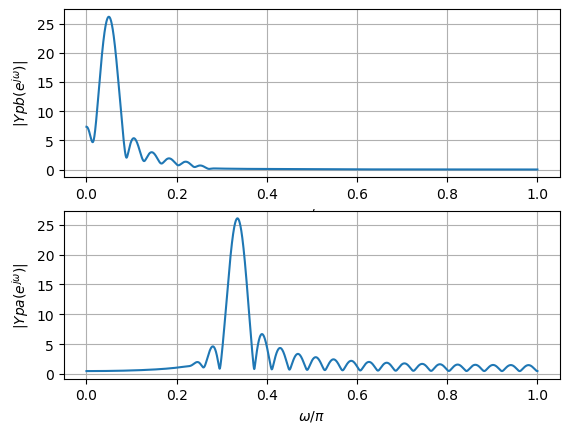

In [202]:
ypbkaiserf=PolynomialRatio(ypbkaiser,[1]);

Ypbkaiser=freqz(ypbkaiserf,w)
subplot(211);
plot(wkaiser/pi,abs.(Ypbkaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Ypb(e^{j\omega})|$");
subplot(212);
ypakaiserf=PolynomialRatio(ypakaiser,[1]);

Ypakaiser=freqz(ypakaiserf,w)

plot(wkaiser/pi,abs.(Ypakaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Ypa(e^{j\omega})|$");


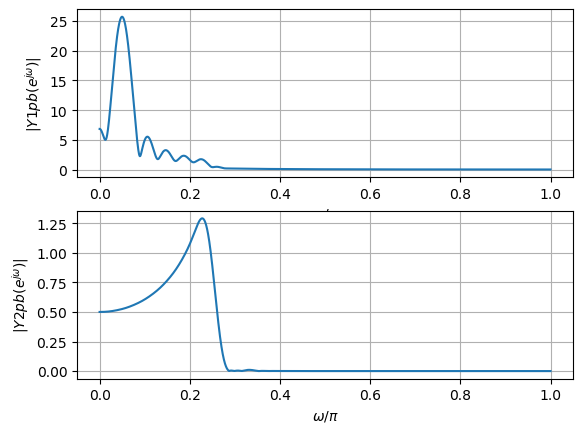

In [203]:
y1pbkaiserf=PolynomialRatio(y1pbkaiser,[1]);

Y1pbkaiser=freqz(y1pbkaiserf,w)
subplot(211);
plot(wkaiser/pi,abs.(Y1pbkaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Y1pb(e^{j\omega})|$");
subplot(212);
y2pbkaiserf=PolynomialRatio(y2pbkaiser,[1]);

Y2pbkaiser=freqz(y2pbkaiserf,w)

plot(wkaiser/pi,abs.(Y2pbkaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Y2pb(e^{j\omega})|$");

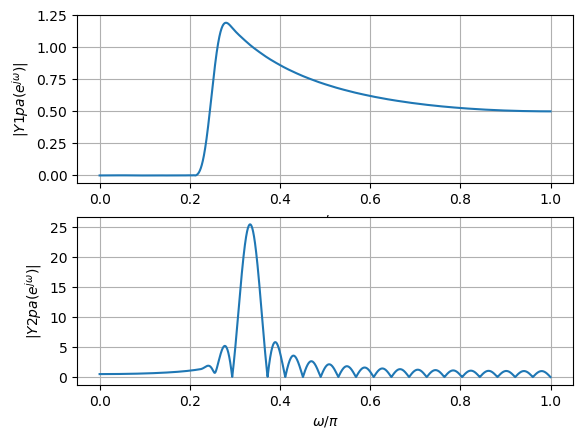

In [204]:
y1pakaiserf=PolynomialRatio(y1pakaiser,[1]);

Y1pakaiser=freqz(y1pakaiserf,w)
subplot(211);
plot(wkaiser/pi,abs.(Y1pakaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Y1pa(e^{j\omega})|$");
subplot(212);
y2pakaiserf=PolynomialRatio(y2pakaiser,[1]);

Y2pakaiser=freqz(y2pakaiserf,w)

plot(wkaiser/pi,abs.(Y2pakaiser))
xlabel(L"$\omega/\pi$");
grid()
ylabel(L"$|Y2pa(e^{j\omega})|$");